In [12]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
import matplotlib.pyplot as plt

In [13]:
import geopandas

In [14]:
bj = geopandas.read_file("./data/beijing/行政区划.shp")

In [16]:
bj

,NAME,Shape_Leng,Shape_Area,面积,geometry
0,昌平区,2.078148,0.141333,1336.1000,"POLYGON Z ((116.32244 40.38358 0.00000, 116.33..."
1,朝阳区,1.418457,0.049293,467.7140,"MULTIPOLYGON Z (((116.48084 40.07908 0.00000, ..."
2,大兴区,2.233111,0.105408,1004.4800,"POLYGON Z ((116.43726 39.81707 0.00000, 116.43..."
3,东城区,0.454513,0.004414,41.9047,"POLYGON Z ((116.40311 39.97191 0.00000, 116.40..."
4,房山区,2.470704,0.203341,1936.1600,"POLYGON Z ((115.76348 39.92405 0.00000, 115.76..."
5,丰台区,1.402951,0.031600,300.3640,"POLYGON Z ((116.24717 39.89550 0.00000, 116.26..."
6,怀柔区,3.499465,0.213806,2009.1700,"POLYGON Z ((116.66525 41.04418 0.00000, 116.67..."
7,门头沟区,2.293522,0.146056,1385.3800,"POLYGON Z ((115.78883 40.16542 0.00000, 115.79..."
8,密云县,2.664916,0.216130,2034.0600,"POLYGON Z ((116.86994 40.79687 0.00000, 116.86..."
9,平谷区,1.477878,0.089950,850.3080,"POLYGON Z ((117.34580 40.16933 0.00000, 117.34..."


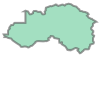

In [20]:
bj.iloc[0]["geometry"]

In [19]:
type(bj.iloc[0]["geometry"])

shapely.geometry.polygon.Polygon

In [43]:
bj.iloc[0]["geometry"].geom_type

'Polygon'

In [25]:
bj.iloc[0]["geometry"].area

0.14133271004999579

In [33]:
import pyproj
from shapely.ops import transform
wgs84 = pyproj.CRS('EPSG:4326')
cgcs2000 = pyproj.CRS('EPSG:4548')

project = pyproj.Transformer.from_crs(wgs84, cgcs2000, always_xy=True).transform
geo = transform(project, bj.iloc[0]["geometry"])

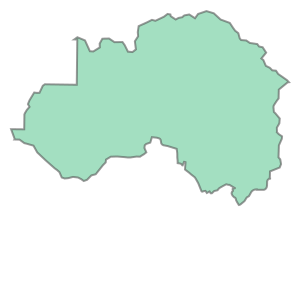

In [36]:
geo

In [68]:
geo.wkt

'POLYGON Z ((442465.367956441 4472341.526229255 0, 443863.7655061682 4471060.537517218 0, 445740.0673124245 4470370.464056474 0, 446373.6223211034 4469403.126307134 0, 446831.2852656418 4468770.232083245 0, 447472.7340352874 4468284.885492464 0, 447764.374728863 4467214.575437552 0, 448046.7007356989 4466875.035709378 0, 449103.2489640479 4466785.637515941 0, 449837.4889130259 4466276.552254461 0, 451351.3606299703 4466054.511855222 0, 451705.9767345022 4465558.070968806 0, 452447.8343601997 4465401.213242806 0, 453161.7365517765 4464298.492349721 0, 452188.4742491271 4463106.425612046 0, 452596.2568966878 4462785.146697375 0, 453097.3740523085 4461607.148789128 0, 453918.0496406111 4461198.990991823 0, 454417.5583983213 4460687.367143715 0, 455178.2792841802 4460609.515130864 0, 455621.6806108311 4459937.292626826 0, 457467.7560794909 4458641.871869348 0, 457811.0089054564 4458260.174071784 0, 457554.7531304795 4458228.29865333 0, 455753.5603087789 4456753.991015423 0, 455706.31957612

In [37]:
geo.area

1336104793.3203673

In [42]:
geo.bounds

(401060.3135495087, 4433166.12925682, 457811.0089054564, 4472785.111651502)

<AxesSubplot:>

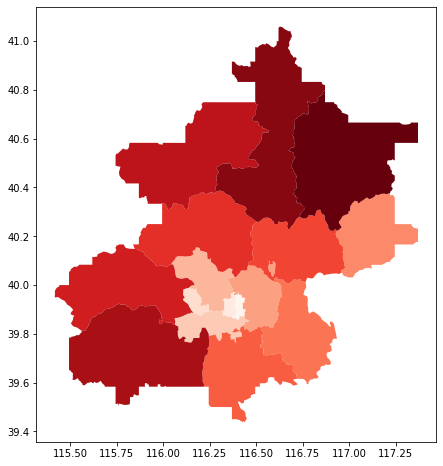

In [59]:
f,ax = plt.subplots(figsize=(8,8))
bj.sort_values("面积").plot(ax=ax,cmap="Reds")

<AxesSubplot:>

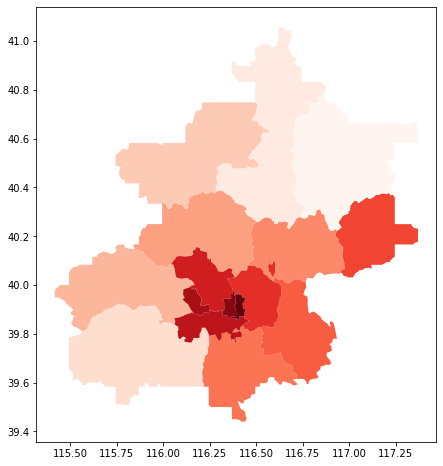

In [61]:
f,ax = plt.subplots(figsize=(8,8))
bj.sort_values("面积",ascending=False).plot(ax=ax,cmap="Reds")